In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [ ]:
heart_disease = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')

In [ ]:
heart_disease = heart_disease.drop(heart_disease[heart_disease['cholesterol']== 0].index)

In [ ]:
heart_disease

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [ ]:
HD_dependent = heart_disease.iloc[:,:-1]
target = heart_disease.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(HD_dependent, target,test_size=0.2, random_state=0, stratify=target)
SC = StandardScaler()
X_train_scaled = SC.fit_transform(X_train)
X_test_scaled = SC.transform(X_test)

In [ ]:
neural_network = tf.keras.models.Sequential()
neural_network.add(tf.keras.layers.Dense(9,activation='relu',input_shape=(11,)))
neural_network.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
neural_network.compile(optimizer='adam',loss='binary_crossentropy',metrics='binary_accuracy')

In [ ]:
neural_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 108       
                                                                 
 dense_1 (Dense)             (None, 1)                 10        
                                                                 
Total params: 118 (472.00 Byte)
Trainable params: 118 (472.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = neural_network.fit(X_train_scaled, y_train, \
                    batch_size = 50, epochs= 50, \
                    verbose=2, \
                    validation_split=0.2)

Epoch 1/50
14/14 - 6s - loss: 0.6283 - binary_accuracy: 0.6743 - val_loss: 0.6027 - val_binary_accuracy: 0.6871 - 6s/epoch - 407ms/step
Epoch 2/50
14/14 - 0s - loss: 0.5921 - binary_accuracy: 0.7112 - val_loss: 0.5612 - val_binary_accuracy: 0.7301 - 80ms/epoch - 6ms/step
Epoch 3/50
14/14 - 0s - loss: 0.5637 - binary_accuracy: 0.7296 - val_loss: 0.5327 - val_binary_accuracy: 0.7362 - 80ms/epoch - 6ms/step
Epoch 4/50
14/14 - 0s - loss: 0.5409 - binary_accuracy: 0.7527 - val_loss: 0.5079 - val_binary_accuracy: 0.7607 - 65ms/epoch - 5ms/step
Epoch 5/50
14/14 - 0s - loss: 0.5230 - binary_accuracy: 0.7650 - val_loss: 0.4906 - val_binary_accuracy: 0.7669 - 67ms/epoch - 5ms/step
Epoch 6/50
14/14 - 0s - loss: 0.5085 - binary_accuracy: 0.7696 - val_loss: 0.4735 - val_binary_accuracy: 0.7791 - 72ms/epoch - 5ms/step
Epoch 7/50
14/14 - 0s - loss: 0.4950 - binary_accuracy: 0.7819 - val_loss: 0.4598 - val_binary_accuracy: 0.7853 - 88ms/epoch - 6ms/step
Epoch 8/50
14/14 - 0s - loss: 0.4841 - binary_ac

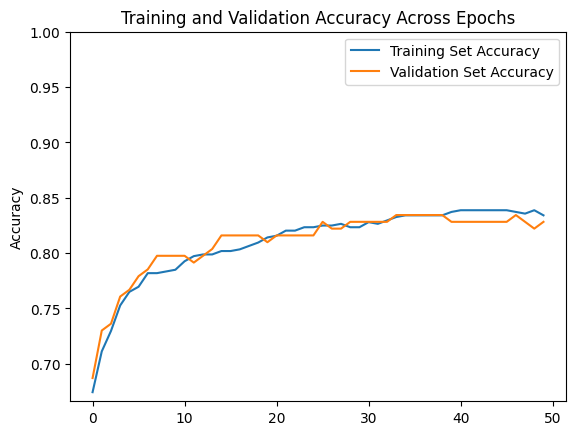

In [ ]:
accuracy = history.history['binary_accuracy']
validation_accuracy = history.history['val_binary_accuracy']
plt.plot(accuracy, label='Training Set Accuracy')
plt.plot(validation_accuracy, label='Validation Set Accuracy')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

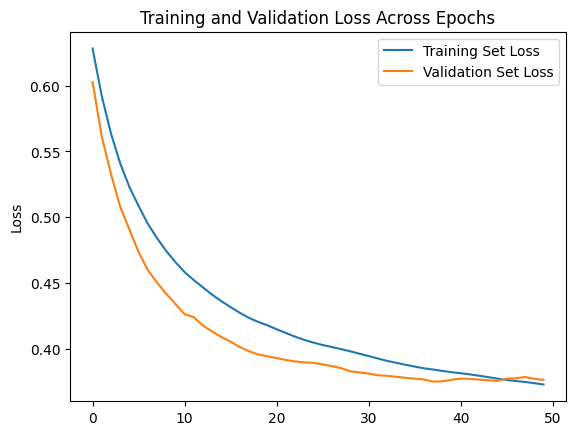

In [ ]:
loss = history.history['loss']
validation_loss = history.history['val_loss']
plt.plot(loss, label='Training Set Loss')
plt.plot(validation_loss, label='Validation Set Loss')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Across Epochs')
plt.legend()

7/7 [==============================] - 0s 2ms/step


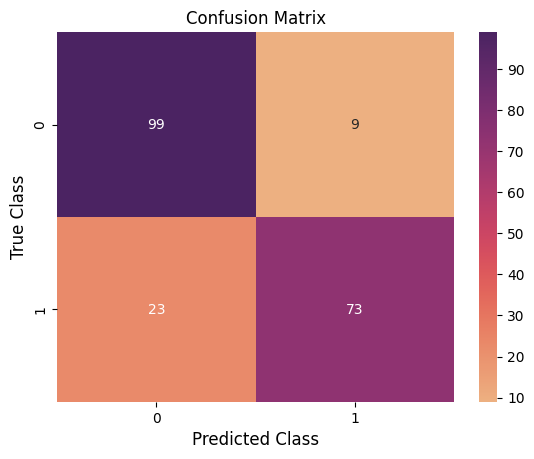

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = neural_network.predict(X_test_scaled)

y_pred = np.round(y_pred)

confusion_matrix = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(confusion_matrix, cmap='flare',annot=True, fmt='d')
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       108
           1       0.89      0.76      0.82        96

    accuracy                           0.84       204
   macro avg       0.85      0.84      0.84       204
weighted avg       0.85      0.84      0.84       204



In [ ]:
neural_network.count_params()

118